# Table of Contents

### a. Notebook Prep
### b. Consistency Check
### 2. Security Concerns
### 3a. Create a Regional Segmentation of Data
### 3b. Check Spending Habits by US Region
### 4. Exclude Low-Activity Customers
### 5. Create an Assumed Profiling Variable
### 6. Profile Distribution Visualizations
### 7. Aggregate mean, max, and min for usage frequency and expenditure
### 8. Compare Customer profiles with Regions and Deparments
### 9. Other Comparisons Needed for the Report
    Histogram of Department ID
    Count Excluded Observations

### Notebook Prep

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
#Define 'path' variable

path = r'C:\Users\PC Planet\Desktop\Self-Education\Data Immersion\Achievement 4\Instacart Basket Analysis'

In [3]:
#Import dataframe

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
#Import old dataframe for mandatory consistency check

ords_prods_merge = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_LEFT_ONLY.csv'))

In [3]:
#Import CHECKPOINT dataframe

df2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'dataframe_after_exclusion.pkl'))

In [3]:
#Import CHECKPOINT dataframe 2

df2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'dataframe_with_profile.pkl'))

In [3]:
#Import excluded_customers

df_excluded = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'excluded_customers.pkl'))

### Consistency Check

In [5]:
crosstab_consistency = pd.crosstab(ords_prods_merge['days_since_prior_order'], ords_prods_merge['order_number'], dropna = False)

crosstab_consistency.to_clipboard()

### 2. Security Concerns

In [4]:
#Check Columns for PII

df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_frequency', 'user_frequency', 'first_name',
       'last_name', 'gender', 'state', 'age', 'date_joined', 'dependants',
       'marital_status', 'income'],
      dtype='object')

Columns of concern for PII: first_name, last_name

These columns are unnecessary since we have the user_id column, and the course of action I will use to address this is simple deletion of these name columns.

In [4]:
#Delete 'first_name'

del df['first_name']

In [5]:
#Delete 'last_name'

del df['last_name']

In [7]:
#Check success

df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_frequency', 'user_frequency', 'gender',
       'state', 'age', 'date_joined', 'dependants', 'marital_status',
       'income'],
      dtype='object')

### 3a. Create a Regional Segmentation of Data

In [6]:
#Create lists for each Region

northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [7]:
#Create a Region list based on State

region = []

for state in df['state']:
    if state in northeast:
        region.append('Northeast')
    elif state in midwest:
        region.append('Midwest')
    elif state in south:
        region.append('South')
    elif state in west:
        region.append('West')
    else: region.append('ERROR')

In [8]:
#Add new 'region' column to dataframe

df.insert(25, 'region', region)

In [9]:
#Check column placement results

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_frequency,user_frequency,gender,state,region,age,date_joined,dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-Frequent Customer,Female,Alabama,South,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-Frequent Customer,Female,Alabama,South,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-Frequent Customer,Female,Alabama,South,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-Frequent Customer,Female,Alabama,South,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-Frequent Customer,Female,Alabama,South,31,2/17/2019,3,married,40423


In [10]:
#Check for error values in new column

df['region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

### 3b. Check Spending Habits by US Region

In [13]:
#Create a crosstab of 'spending_flag' and 'region'

crosstab = pd.crosstab(df['spending_flag'], df['region'], dropna = False)

crosstab

region,Midwest,Northeast,South,West
spending_flag,,,,
High Spender,155975,108225,209691,160354
Low Spender,7441350,5614511,10582194,8132559


In [14]:
#Create normalized crosstab for useful representation

crosstab_norm = pd.crosstab(df['spending_flag'], df['region'], dropna = False, normalize='columns')

crosstab_norm

region,Midwest,Northeast,South,West
spending_flag,,,,
High Spender,0.02053,0.018911,0.01943,0.019336
Low Spender,0.97947,0.981089,0.98057,0.980664


There is no significant difference in spending habits between the US regions.  High Spenders make up approximately 2% of the customers in any given area. 98% of all customers are Low Spenders.

### 4. Exclude Low-Activity Customers

In [9]:
#Create exclusion flag

df.loc[df['max_order'] < 5, 'exclusion_flag'] = True
df.loc[df['max_order'] >= 5, 'exclusion_flag'] = False
df.head(20)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,user_frequency,gender,state,region,age,date_joined,dependants,marital_status,income,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-Frequent Customer,Female,Alabama,South,31,2/17/2019,3,married,40423,False
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-Frequent Customer,Female,Alabama,South,31,2/17/2019,3,married,40423,False
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-Frequent Customer,Female,Alabama,South,31,2/17/2019,3,married,40423,False
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-Frequent Customer,Female,Alabama,South,31,2/17/2019,3,married,40423,False
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-Frequent Customer,Female,Alabama,South,31,2/17/2019,3,married,40423,False
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Non-Frequent Customer,Female,Alabama,South,31,2/17/2019,3,married,40423,False
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Non-Frequent Customer,Female,Alabama,South,31,2/17/2019,3,married,40423,False
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Non-Frequent Customer,Female,Alabama,South,31,2/17/2019,3,married,40423,False
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Non-Frequent Customer,Female,Alabama,South,31,2/17/2019,3,married,40423,False
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Non-Frequent Customer,Female,Alabama,South,31,2/17/2019,3,married,40423,False


In [10]:
#Create dataframe with 'exclusion_flag' == True

ex = df[df['exclusion_flag']==True]

In [21]:
#Export dataframe of excluded customers

ex.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'excluded_customers.pkl'))

In [11]:
#Create dataframe with 'exclusion_flag' == False

df2 = df[df['exclusion_flag']==False]

In [13]:
#Export dataframe of included customers for notebook checkpoint

df2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'dataframe_after_exclusion.pkl'))

### 5. Create an Assumed Profiling Variable

Possible Profiling Clues:

department_id ... babies (18), pets (8), produce (4), meat seafood (12), dairy eggs (16), alcohol (5)
age ... < 30 = young , 30 - 44 adult, 45 - 64 middle-aged , 65+ elderly
gender ... male, female
dependants ... 0 = n/a, >0 = father, mother, >0 + recurring department_id 18 = with infant
marital status ... married, single, divorced or widowed, else single
income (based on 2020 household median $65000)... < 32500 = Struggling, 32500 - 64999 = Lower-Middle Class, 65000 - 97499 Upper-Middle Class, 97500 - 194999 = High Class, 195000+ = Wealthy

Plan: Build a coherent list in each row using these descriptors

Income + Age + if(Department ID + Dietary Assumptions(Alcohol then Diet)) + Marital Status + Gender + 'with' + if(Baby? + Dependants) + 'and' + if(Pets)

Example:
Struggling Young Vegetarian Married Male with Infant Children and Pets

Word choice must be uniquely identifiable--do not use labels that can get caught in string searches for another label!

#### PROFILING DEFINITIONS

INCOME (based on 2020 US household median of $65,000)
'Struggling': Income < 32500 (<50% of median)
'Lower-Middle Class': Income >= 32500 AND Income < 65000 (50% to 100% of median)
'Upper-Middle Class': Income >= 65000 AND Income < 97500 (100% to 150% of median)
'High Class': Income >= 97500 AND Income < 195000 (150% to 300% of median)
'Wealthy': Income >= 195000 (<= 300% of median)

AGE
'Young': Age < 30
'Adult': Age >= 30 AND Age < 45
'Middle-Aged': Age >= 45 AND Age < 65
'Elderly: Age >= 65

DIETARY
'Vegetarian': Purchases from Department_ID 4, no purchases from Department_ID 12
'Vegan': Purchases from Department_ID 4, no purchases from Department_ID 12 nor 16
'Carnivorous': Purchases from Department_ID 12 
'Alcohol-Consuming': Purchases from Department_ID 5
'Abstinent': No purchases from Department_ID 5

MARITAL STATUS
'Married': Married
'Single': Single, not Divorced or Widowed, and Living with Parents and Siblings
'Divorced or Widowed': Divorced or Widowed

DEPENDANTS
'Children': Dependants > 0

PETS
'Pets': Purchases from Department 8

#### Create Assumed Profile

In [4]:
#Sort dataframe by user_id and order_number

df2 = df2.sort_values(['user_id','order_number'])

In [5]:
#Reset index

df2.reset_index(drop = True, inplace = True)

In [6]:
#Add and fill income_profile column

    
df2.loc[df2['income'] < 32500, 'income_profile'] = 'Struggling '

df2.loc[(df2['income'] >= 32500) & (df2 ['income'] < 65000), 'income_profile'] = 'Lower-Middle Class '

df2.loc[(df2['income'] >= 65000) & (df2['income'] < 97500), 'income_profile'] = 'Upper-Middle Class '

df2.loc[(df2['income'] >= 97500) & (df2['income'] < 195000), 'income_profile'] = 'High-Class '

df2.loc[df2['income'] >= 195000, 'income_profile'] = 'Wealthy '



df2['income_profile'].value_counts()

High-Class             14940233
Upper-Middle Class      8655725
Lower-Middle Class      6551596
Struggling               555743
Wealthy                  261267
Name: income_profile, dtype: int64

In [7]:
#Add and fill age_profile column

df2.loc[df2['age'] < 30, 'age_profile'] = 'Young '

df2.loc[(df2['age'] >= 30) & (df2['age'] < 45), 'age_profile'] = 'Adult '

df2.loc[(df2['age'] >= 45) & (df2['age'] < 65), 'age_profile'] = 'Middle-Aged '

df2.loc[df2['age'] >= 65, 'age_profile'] = 'Elderly '


df2['age_profile'].value_counts()

Middle-Aged     9690051
Elderly         8195544
Adult           7261366
Young           5817603
Name: age_profile, dtype: int64

In [8]:
#Create users_alcohol subset

users_alcohol = df2.query("department_id == 5")

In [9]:
#Create unique users list

unique_alcohol = np.unique(users_alcohol['user_id'])

In [10]:
#Add and fill alcohol_profile column

df2.loc[df2['user_id'].isin(unique_alcohol), 'alcohol_profile'] = 'Alcohol-Consuming '

df2.loc[~df2['user_id'].isin(unique_alcohol), 'alcohol_profile'] = 'Abstinent '

df2['alcohol_profile'].value_counts()

Abstinent             28634074
Alcohol-Consuming      2330490
Name: alcohol_profile, dtype: int64

In [11]:
#Create users_diet subsets

users_meat = df2.query("department_id == 12")

users_dairy = df2.query("department_id == 16")

users_produce = df2.query("department_id == 4")

In [12]:
#Create unique users list

unique_meat = np.unique(users_meat['user_id'])

unique_dairy = np.unique(users_dairy['user_id'])

unique_produce = np.unique(users_produce['user_id'])

In [13]:
#Add and fill diet_profile column

df2.loc[df2['user_id'].isin(unique_meat), 'diet_profile'] = 'Carnivorous '

df2.loc[(~df2['user_id'].isin(unique_meat)) & (df2['user_id'].isin(unique_dairy)), 'diet_profile'] = 'Vegetarian '

df2.loc[(~df2['user_id'].isin(unique_meat)) & (~df2['user_id'].isin(unique_dairy)) & (df2['user_id'].isin(unique_produce)), 'diet_profile'] = 'Vegan '

df2.loc[(~df2['user_id'].isin(unique_meat)) & (~df2['user_id'].isin(unique_dairy)) & (~df2['user_id'].isin(unique_produce)), 'diet_profile'] = ''

df2['diet_profile'].value_counts()

Carnivorous     23065332
Vegetarian       7589236
Vegan             233910
                   76086
Name: diet_profile, dtype: int64

In [14]:
#Add and fill marital_profile column

df2.loc[df2['marital_status']=='married', 'marital_profile'] = 'Married '

df2.loc[df2['marital_status'] == 'divorced/widowed', 'marital_profile'] = 'Divorced/Widowed '

df2.loc[(df2['marital_status'] != 'married') & (df2['marital_status'] != 'divorced/widowed'), 'marital_profile'] = 'Single '

df2['marital_profile'].value_counts()

Married              21743711
Single                6575582
Divorced/Widowed      2645271
Name: marital_profile, dtype: int64

In [15]:
#Add and fill dependants_profile column

df2.loc[df2['dependants'] == 0, 'dependants_profile'] = ''

df2.loc[df2['dependants'] > 0, 'dependants_profile'] = ' with Children'

df2['dependants_profile'].value_counts()

 with Children    23224883
                   7739681
Name: dependants_profile, dtype: int64

In [16]:
#Create users_pets subset

users_pets = df2.query("department_id == 8")

In [17]:
#Create unique users list

unique_pets = np.unique(users_pets['user_id'])

In [18]:
#Add and fill pets_profile column

df2.loc[(df2['user_id'].isin(unique_pets)) & (df2['dependants'] == 0), 'pets_profile'] = 'with Pets'

df2.loc[(df2['user_id'].isin(unique_pets)) & (df2['dependants'] > 0), 'pets_profile'] = ' and Pets'

df2.loc[~df2['user_id'].isin(unique_pets), 'pets_profile'] = ''

df2['pets_profile'].value_counts()

             27513213
 and Pets     2587259
with Pets      864092
Name: pets_profile, dtype: int64

In [19]:
df2['assumed_profile'] = df2['income_profile'] + df2['age_profile'] + df2['alcohol_profile'] + df2['diet_profile'] + df2['marital_profile'] + df2['gender'] + df2['dependants_profile'] + df2['pets_profile']

df2['assumed_profile'].value_counts()

High-Class Middle-Aged Abstinent Carnivorous Married Male with Children        1697554
High-Class Middle-Aged Abstinent Carnivorous Married Female with Children      1647826
High-Class Elderly Abstinent Carnivorous Married Male with Children            1436513
High-Class Elderly Abstinent Carnivorous Married Female with Children          1429638
Upper-Middle Class Adult Abstinent Carnivorous Married Female with Children     743747
                                                                                ...   
Upper-Middle Class Young Abstinent Single Male with Children and Pets               11
Upper-Middle Class Elderly Alcohol-Consuming Vegan Divorced/Widowed Female          11
Struggling Young Alcohol-Consuming Married Male with Children                        9
Struggling Adult Alcohol-Consuming Vegan Married Female with Children                8
High-Class Young Abstinent Single Female                                             8
Name: assumed_profile, Length: 1112, dtype:

In [20]:
#Export CHECKPOINT dataframe

df2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'dataframe_with_profile.pkl'))

### 6. Profile Distribution Visualizations

This question really makes the assumption that we created the profiles in a very specific way, a way which I did not do.  Instead, I will have to make multiple visualizations to answer the question.

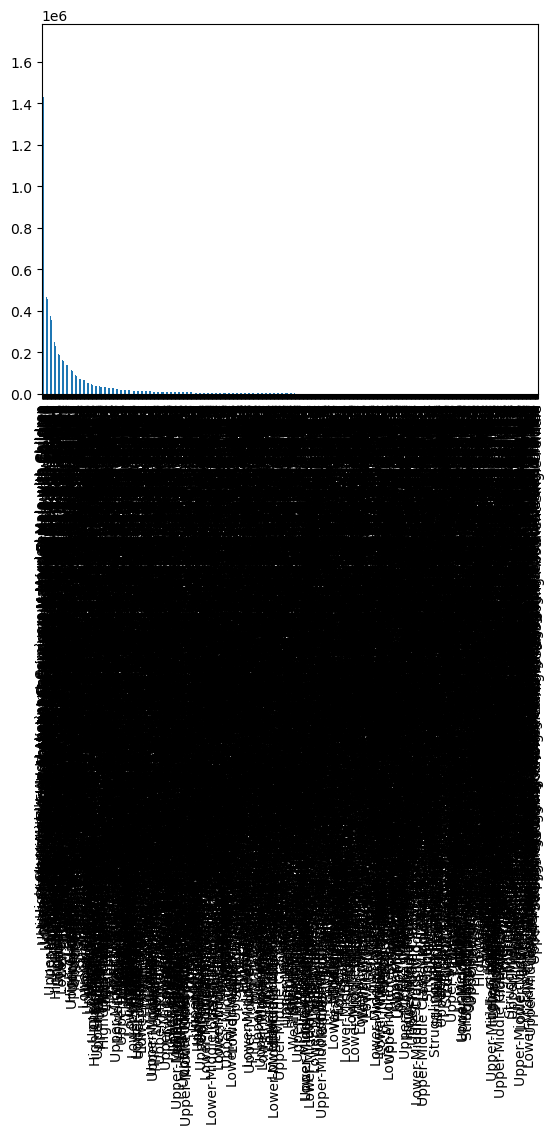

In [4]:
#Create full profile bar chart, just for show

full_profile = df2['assumed_profile'].value_counts().sort_values(ascending=False).plot.bar()

In [5]:
#Save chart

full_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'full_profile_bar.png'))

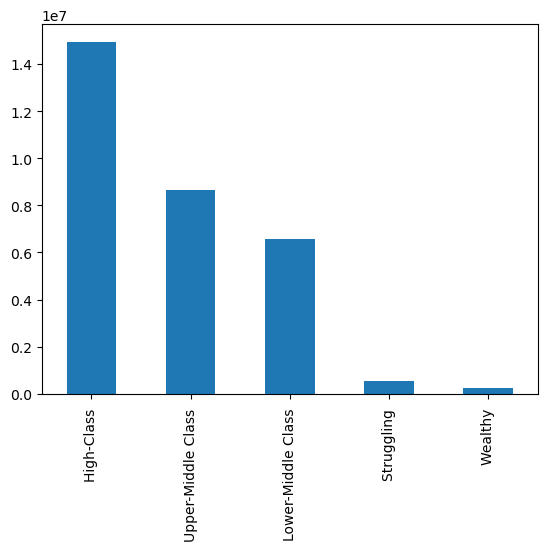

In [25]:
#Create wealth bar chart

wealth_bar = df2['income_profile'].value_counts().sort_values(ascending=False).plot.bar()

In [26]:
#Save chart

wealth_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'wealth_distribution_bar.png'))

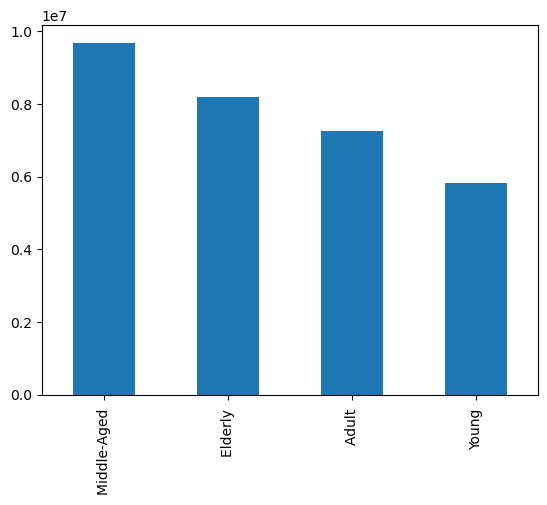

In [27]:
#Create age bar chart

age_bar = df2['age_profile'].value_counts().plot.bar()

In [28]:
#Save age bar chart

age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_distribution_bar.png'))

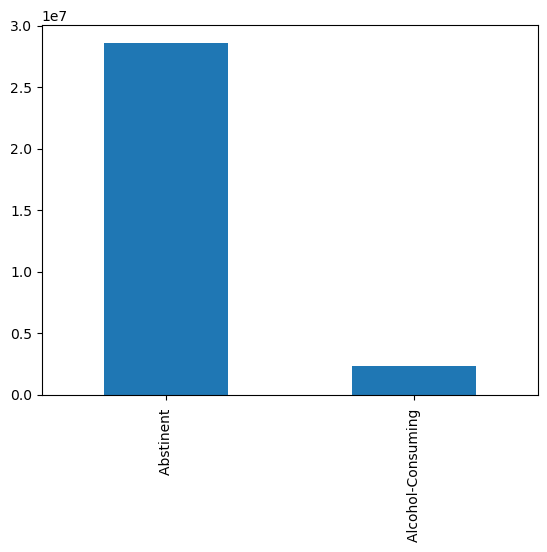

In [29]:
#Create alcohol bar chart

alcohol_bar = df2['alcohol_profile'].value_counts().plot.bar()

In [30]:
#Save alcohol bar chart

alcohol_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'alcohol_distribution_bar.png'))

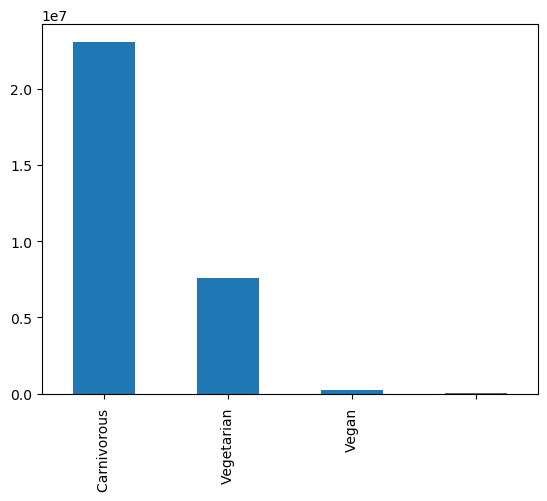

In [31]:
#Create diet bar chart

diet_bar = df2['diet_profile'].value_counts().plot.bar()

In [32]:
#Save diet bar chart

diet_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'diet_distribution_bar.png'))

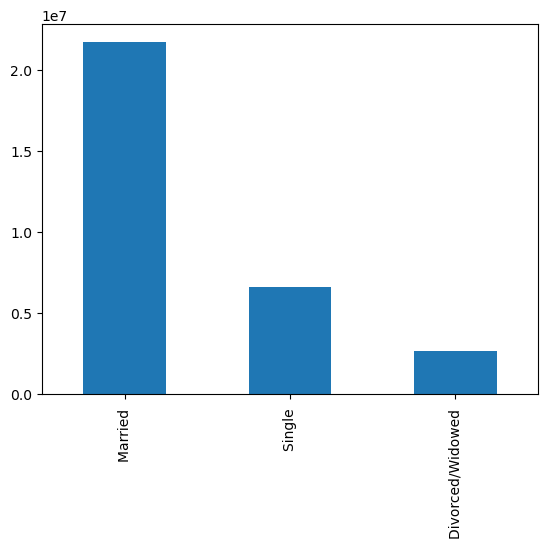

In [33]:
#Create marital bar chart

marital_bar = df2['marital_profile'].value_counts().plot.bar()

In [34]:
#Save marital bar chart

marital_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'marital_distribution_bar.png'))

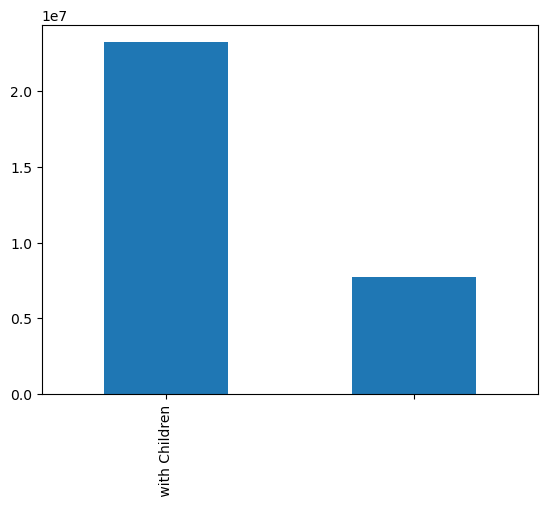

In [35]:
#Create dependants bar chart

dependants_bar = df2['dependants_profile'].value_counts().plot.bar()

In [36]:
#Save dependants bar chart

dependants_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_distribution_bar.png'))

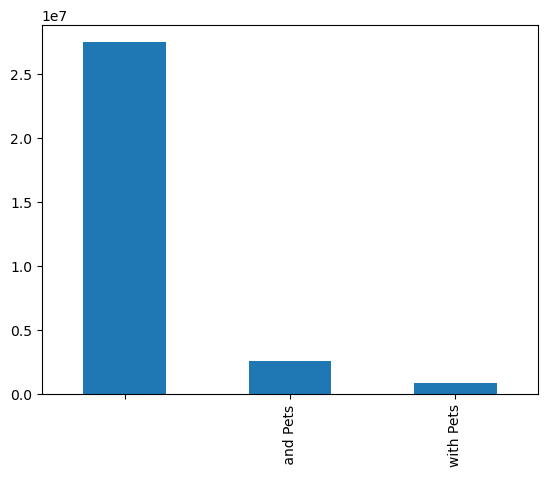

In [37]:
#Create pets bar chart

pets_bar = df2['pets_profile'].value_counts().plot.bar()

In [38]:
#Save pets bar chart

pets_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pets_distribution_bar.png'))

### 7. Aggregate max, mean, and min for usage frequency and expenditure

In [39]:
df2.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_frequency', 'user_frequency', 'gender',
       'state', 'region', 'age', 'date_joined', 'dependants', 'marital_status',
       'income', 'exclusion_flag', 'income_profile', 'age_profile',
       'alcohol_profile', 'diet_profile', 'marital_profile',
       'dependants_profile', 'pets_profile', 'assumed_profile'],
      dtype='object')

In [43]:
#Aggregate for usage frequency

df2.groupby('assumed_profile').agg({'median_frequency': ['mean', 'min', 'max']})

median_frequency           
                                                               mean  min   max
assumed_profile                                                               
High-Class Adult Abstinent Carnivorous Married ...         9.586412  1.0  30.0
High-Class Adult Abstinent Carnivorous Married ...         8.875700  2.0  30.0
High-Class Adult Abstinent Carnivorous Married ...         9.588151  1.0  30.0
High-Class Adult Abstinent Carnivorous Married ...         9.780511  2.0  30.0
High-Class Adult Abstinent Carnivorous Single F...         9.871390  1.0  30.0
...                                                             ...  ...   ...
Wealthy Young Alcohol-Consuming Vegetarian Marr...        11.501984  7.0  24.0
Wealthy Young Alcohol-Consuming Vegetarian Marr...         7.000000  7.0   7.0
Wealthy Young Alcohol-Consuming Vegetarian Sing...         7.170767  5.0  30.0
Wealthy Young Alcohol-Consuming Vegetarian Sing...        13.223776  7.0  22.0
Wealthy Young Alcohol-Consuming Vegetarian Sing...         6.000000  6.0   6.0

[1112 rows x 3 columns]

In [44]:
#Aggregate for expenditure

df2.groupby('assumed_profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                                                          mean  min      max
assumed_profile                                                             
High-Class Adult Abstinent Carnivorous Married ...   11.548412  1.0  99999.0
High-Class Adult Abstinent Carnivorous Married ...   15.599659  1.0  99999.0
High-Class Adult Abstinent Carnivorous Married ...   14.816097  1.0  99999.0
High-Class Adult Abstinent Carnivorous Married ...   15.384299  1.0  99999.0
High-Class Adult Abstinent Carnivorous Single F...   11.977225  1.0  99999.0
...                                                        ...  ...      ...
Wealthy Young Alcohol-Consuming Vegetarian Marr...  361.374008  1.0  14900.0
Wealthy Young Alcohol-Consuming Vegetarian Marr...  156.397667  1.1  14900.0
Wealthy Young Alcohol-Consuming Vegetarian Sing...  195.797395  1.1  99999.0
Wealthy Young Alcohol-Consuming Vegetarian Sing...  597.330303  1.2  14900.0
Wealthy Young Alcohol-Consuming Vegetarian Sing...   36.695922  1.1  14900.0

[1112 rows x 3 columns]

### 8. Compare customer profiles with regions and departments

In [46]:
#Compare income with regions

df2.groupby('region')['income_profile'].value_counts()

region     income_profile     
Midwest    High-Class             3557974
           Upper-Middle Class     1997554
           Lower-Middle Class     1505861
           Struggling              133005
           Wealthy                  67119
Northeast  High-Class             2649356
           Upper-Middle Class     1526474
           Lower-Middle Class     1155067
           Struggling               91948
           Wealthy                  41840
South      High-Class             4902004
           Upper-Middle Class     2931662
           Lower-Middle Class     2198901
           Struggling              193225
           Wealthy                  85347
West       High-Class             3830899
           Upper-Middle Class     2200035
           Lower-Middle Class     1691767
           Struggling              137565
           Wealthy                  66961
Name: income_profile, dtype: int64

Inference: Instacart is more often used by those who are middle- or high-class, but not wealthy. People who are wealthy likely do not need the company's services; those who are struggling likely cannot afford it.  Therefore, the main demographic is the middle-class, targeting those with larger incomes.

In [47]:
#Compare diet with regions

df2.groupby('region')['diet_profile'].value_counts()

region     diet_profile
Midwest    Carnivorous     5390120
           Vegetarian      1798457
           Vegan             55067
                             17869
Northeast  Carnivorous     4076054
           Vegetarian      1333916
           Vegan             42299
                             12416
South      Carnivorous     7678145
           Vegetarian      2531878
           Vegan             75795
                             25321
West       Carnivorous     5921013
           Vegetarian      1924985
           Vegan             60749
                             20480
Name: diet_profile, dtype: int64

Midwestern Vegetarians and Vegans: 25.5%
Northeastern Vegetarians and Vegans: 25.2%
Southern Vegetarians and Vegans: 25.3%
Western Vegetarians and Vegans: 25.0%

In [48]:
df2.groupby('diet_profile')['region'].value_counts()

diet_profile  region   
              South          25321
              West           20480
              Midwest        17869
              Northeast      12416
Carnivorous   South        7678145
              West         5921013
              Midwest      5390120
              Northeast    4076054
Vegan         South          75795
              West           60749
              Midwest        55067
              Northeast      42299
Vegetarian    South        2531878
              West         1924985
              Midwest      1798457
              Northeast    1333916
Name: region, dtype: int64

In [54]:
#Compare income with departments

pd.set_option("display.max_rows", None, "display.max_columns", None)

df2.groupby('income_profile')['department_id'].value_counts()

income_profile       department_id
High-Class           4                4486442
                     16               2533065
                     7                1178422
                     19               1157419
                     1                1034819
                     13                881707
                     3                 551968
                     15                508623
                     20                486775
                     9                 413735
                     12                352693
                     17                329276
                     14                311395
                     18                208409
                     11                202864
                     6                 126577
                     5                  66996
                     8                  46417
                     21                 31107
                     2                  16351
                     10                 15173

In [9]:
#Compare age with departments

df2.groupby('department_id')['age_profile'].value_counts()

department_id  age_profile 
1              Middle-Aged     667149
               Elderly         564250
               Adult           492115
               Young           398217
2              Middle-Aged      10811
                                ...  
20             Young           188533
21             Middle-Aged      20340
               Elderly          16915
               Adult            14944
               Young            12569
Name: age_profile, Length: 84, dtype: int64

In [6]:
#Compare alcohol with regions

df2.groupby('region')['alcohol_profile'].value_counts()

region     alcohol_profile   
Midwest    Abstinent             6714244
           Alcohol-Consuming      547269
Northeast  Abstinent             5072208
           Alcohol-Consuming      392477
South      Abstinent             9524643
           Alcohol-Consuming      786496
West       Abstinent             7322979
           Alcohol-Consuming      604248
Name: alcohol_profile, dtype: int64

In [12]:
#Compare gender with departments

df2.groupby('department_id')['gender'].value_counts()

department_id  gender
1              Male      1069252
               Female    1052479
2              Male        17256
               Female      17155
3              Male       561685
               Female     559143
4              Male      4577998
               Female    4501275
5              Female      74844
               Male        69783
6              Male       129363
               Female     126628
7              Male      1291517
               Female    1280384
8              Male        47693
               Female      45367
9              Male       414037
               Female     408099
10             Female      16742
               Male        16709
11             Male       212382
               Female     211924
12             Male       341297
               Female     333484
13             Male       898596
               Female     884109
14             Male       336377
               Female     334473
15             Male       513573
               Female

In [13]:
#Compare gender with region

df2.groupby('region')['gender'].value_counts()

region     gender
Midwest    Female    3637482
           Male      3624031
Northeast  Male      2825019
           Female    2639666
South      Male      5174111
           Female    5137028
West       Female    3963648
           Male      3963579
Name: gender, dtype: int64

In [4]:
#Compare region with prices

df2.groupby(['region']).agg({'prices':['mean']})

,prices
,mean
region,
Midwest,12.681835
Northeast,11.542582
South,12.118845
West,11.276491


In [8]:
#Compare age with region and prices

df2.groupby(['region', 'age_profile']).agg({'prices':['mean']})

prices
                             mean
region    age_profile            
Midwest   Adult         12.094668
          Elderly       11.084952
          Middle-Aged   12.847727
          Young         15.387398
Northeast Adult         11.153306
          Elderly       11.891074
          Middle-Aged   12.156916
          Young         10.497131
South     Adult         12.348379
          Elderly       12.223192
          Middle-Aged   12.083916
          Young         11.745140
West      Adult         10.770013
          Elderly       11.673201
          Middle-Aged   11.447538
          Young         11.053406

Young people in the Midwest are more willing to spend money than any other demographic, and young people in the Northeast are the least willing.

In [12]:
#Compare age and department and prices

pd.set_option("display.max_rows", None, "display.max_columns", None)

df2.groupby(['department_id', 'age_profile']).agg({'prices':['mean']})

prices
                                 mean
department_id age_profile            
1             Adult          7.746956
              Elderly        7.725412
              Middle-Aged    7.737667
              Young          7.722550
2             Adult          7.060298
              Elderly        6.914185
              Middle-Aged    7.017195
              Young          6.825525
3             Adult          7.825583
              Elderly        7.876077
              Middle-Aged    7.860740
              Young          7.865869
4             Adult          7.977789
              Elderly        7.980704
              Middle-Aged    7.983508
              Young          7.977806
5             Adult          8.196819
              Elderly        8.155814
              Middle-Aged    8.118345
              Young          8.142755
6             Adult          7.708366
              Elderly        7.708089
              Middle-Aged    7.666090
              Young          7.622771
7             Adult          7.707058
              Elderly        7.692069
              Middle-Aged    7.669524
              Young          7.660613
8             Adult          7.909219
              Elderly        7.919677
              Middle-Aged    7.779730
              Young          7.985129
9             Adult          7.346986
              Elderly        7.330059
              Middle-Aged    7.377958
              Young          7.332109
10            Adult          8.376777
              Elderly        8.361520
              Middle-Aged    8.298592
              Young          8.367867
11            Adult          7.980975
              Elderly        8.008107
              Middle-Aged    8.026156
              Young          7.961349
12            Adult         16.291015
              Elderly       16.311238
              Middle-Aged   16.310730
              Young         16.277436
13            Adult          8.016033
              Elderly        8.006594
              Middle-Aged    8.024992
              Young          8.006116
14            Adult          8.042837
              Elderly        8.000213
              Middle-Aged    8.059601
              Young          8.014918
15            Adult          7.555273
              Elderly        7.554048
              Middle-Aged    7.545060
              Young          7.528399
16            Adult         31.472884
              Elderly       32.074993
              Middle-Aged   34.309285
              Young         34.650321
17            Adult          7.400213
              Elderly        7.373896
              Middle-Aged    7.380932
              Young          7.361492
18            Adult          7.658360
              Elderly        7.650721
              Middle-Aged    7.583816
              Young          7.666874
19            Adult          4.276141
              Elderly        4.274184
              Middle-Aged    4.275439
              Young          4.276933
20            Adult          7.772632
              Elderly        7.787980
              Middle-Aged    7.788389
              Young          7.781840
21            Adult          8.658880
              Elderly        8.686213
              Middle-Aged    8.642394
              Young          8.657920

No great discrepancy by age and department

In [14]:
#Compare marital status with deparment and prices

pd.set_option("display.max_rows", None, "display.max_columns", None)

df2.groupby(['department_id', 'marital_profile']).agg({'prices':['mean']})

prices
                                      mean
department_id marital_profile             
1             Divorced/Widowed    7.755216
              Married             7.734916
              Single              7.720951
2             Divorced/Widowed    7.042892
              Married             6.973248
              Single              6.897125
3             Divorced/Widowed    7.863604
              Married             7.862000
              Single              7.840202
4             Divorced/Widowed    8.002391
              Married             7.975286
              Single              7.988193
5             Divorced/Widowed    8.042499
              Married             8.200780
              Single              8.039866
6             Divorced/Widowed    7.694201
              Married             7.693756
              Single              7.624008
7             Divorced/Widowed    7.657924
              Married             7.685349
              Single              7.683279
8             Divorced/Widowed    7.730143
              Married             7.861984
              Single              8.026053
9             Divorced/Widowed    7.339615
              Married             7.349597
              Single              7.352559
10            Divorced/Widowed    8.250411
              Married             8.336447
              Single              8.419894
11            Divorced/Widowed    8.024705
              Married             7.994377
              Single              8.002721
12            Divorced/Widowed   16.315690
              Married            16.315670
              Single             16.240620
13            Divorced/Widowed    8.025950
              Married             8.014195
              Single              8.010823
14            Divorced/Widowed    8.040541
              Married             8.028404
              Single              8.038812
15            Divorced/Widowed    7.535295
              Married             7.555733
              Single              7.521073
16            Divorced/Widowed   30.654327
              Married            33.197072
              Single             33.830881
17            Divorced/Widowed    7.357390
              Married             7.387182
              Single              7.364485
18            Divorced/Widowed    7.636209
              Married             7.642543
              Single              7.607182
19            Divorced/Widowed    4.268954
              Married             4.276859
              Single              4.273886
20            Divorced/Widowed    7.847583
              Married             7.775449
              Single              7.783228
21            Divorced/Widowed    8.859044
              Married             8.638395
              Single              8.661256

No great discrepancy here, either

In [4]:
#Compare prices based on income

df2.groupby('income_profile').agg({'prices':['mean']})

,prices
,mean
income_profile,
High-Class,11.776442
Lower-Middle Class,7.314709
Struggling,6.503702
Upper-Middle Class,8.705148
Wealthy,255.243535


In [6]:
#Compare order frequency by income

df2.groupby('income_profile').agg({'median_frequency':['mean']})

,median_frequency
,mean
income_profile,
High-Class,9.902219
Lower-Middle Class,10.179460
Struggling,10.754584
Upper-Middle Class,9.861115
Wealthy,9.007829


In [7]:
df2.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_frequency', 'user_frequency', 'gender',
       'state', 'region', 'age', 'date_joined', 'dependants', 'marital_status',
       'income', 'exclusion_flag', 'income_profile', 'age_profile',
       'alcohol_profile', 'diet_profile', 'marital_profile',
       'dependants_profile', 'pets_profile', 'assumed_profile'],
      dtype='object')

In [9]:
#Compare diet with frequency

df2.groupby('diet_profile').agg({'median_frequency':['mean']})

,median_frequency
,mean
diet_profile,
,15.952120
Carnivorous,9.605154
Vegan,12.970266
Vegetarian,10.873931


In [10]:
#Compare age with frequency

df2.groupby('age_profile').agg({'median_frequency':['mean']})

,median_frequency
,mean
age_profile,
Adult,9.948097
Elderly,9.933025
Middle-Aged,9.993061
Young,9.942566


In [11]:
#Compare dependants with frequency

df2.groupby('dependants_profile').agg({'median_frequency':['mean']})

,median_frequency
,mean
dependants_profile,
,9.936569
with Children,9.963995


### 9. Other Comparisons Needed for the Report

Histogram of Department_ID

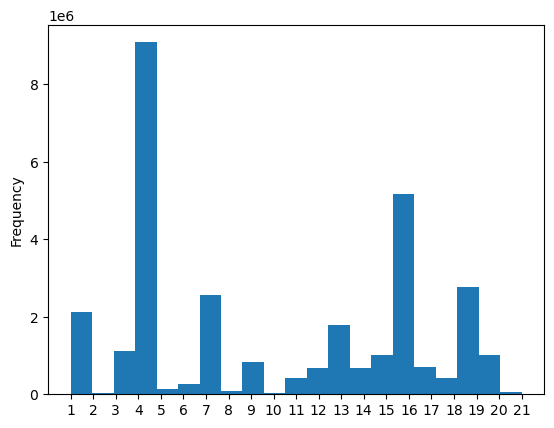

In [7]:
#Create histogram of department_id 

dept_hist = df2['department_id'].plot.hist(bins = 21)
dept_hist.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])

In [8]:
#Save histogram

dept_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_id_histogram.png'))

Count Excluded Observations

In [4]:
#Count excluded observations

df_excluded.shape

(1440295, 32)